### Basic LSTM RNN Model

In [9]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x = torch.linspace(0, 799, 800)

In [8]:
y = torch.sin(x * 2 * 3.1416 / 40)

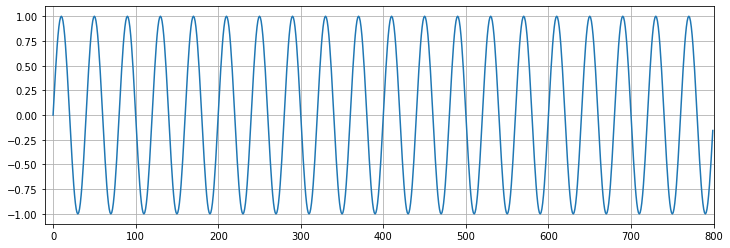

In [12]:
plt.figure(figsize = (12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

In [13]:
test_size = 40
train = y[: - test_size]
test = y[- test_size :]

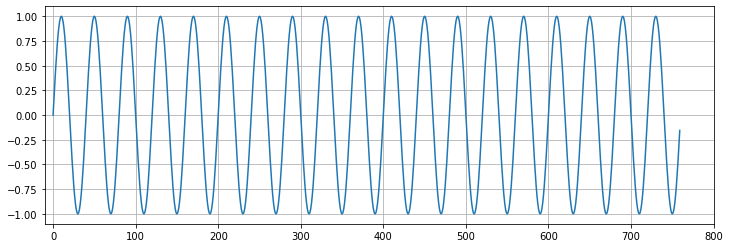

In [15]:
plt.figure(figsize = (12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train.numpy())

In [18]:
# takes a sequence and the sequence size
def prep_data(seq, ss):
    output = [] # ([0,1,2,3],[4]) , ([1,2,3,4],[5]) ....
    l = len(seq)
    
    for i in range(l - ss):
        data = seq[i : i + ss]
        label = seq[i + ss : i + ss + 1]
        output.append((data, label))
        
    return output

In [20]:
# hyperparameters
seq_size = 40

In [25]:
train_data = prep_data(train, seq_size)
len(train_data)

720

In [26]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [29]:
# The LSTM class
class LSTM(nn.Module):
    def __init__(self, input_dim = 1, hidden_dim = 50, output_dim = 1):
        
        super().__init__()
        self.hidden_dim = hidden_dim
        
        self.lstm = nn.LSTM(input_dim, hidden_dim)
        self.fc1 = nn.Linear(hidden_dim, output_dim)
        
        self.hidden = (torch.zeros(1,1,hidden_dim), torch.zeros(1,1,hidden_dim))
    
    def forward(self, seq):
        
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.fc1(lstm_out.view(len(seq), -1))
        
        return pred[-1]
    

In [30]:
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [31]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (fc1): Linear(in_features=50, out_features=1, bias=True)
)